1. Import packages to be used in the project 

In [63]:
#Packages 

#Manipulate data 
import numpy as np 
import pandas as pd 

#View graphs 
import seaborn as sns
from matplotlib import pyplot as plt

# split train and test dataset 
from sklearn.model_selection import train_test_split

# Perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Machine Learning Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Statistical Test 
from scipy import stats


#Evaluate the model 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

#Ignore Warnings 
import warnings
warnings.filterwarnings("ignore")

#Save the model
import joblib 
import pickle

In [115]:
#Setting of graphs 
from matplotlib import rcParams
rcParams['figure.figsize']=12,4
rcParams['lines.linewidth']=3
rcParams['xtick.labelsize']='x-large'
rcParams['ytick.labelsize']='x-large'

2. Loading the data 

In [116]:
# Load the file 
ds = pd.read_csv("Indian_Liver_Patient_Dataset.csv")

In [117]:
#3 - Exploratory analyses  

In [118]:
# shape 
ds.shape

(582, 11)

In [119]:
#view data 
ds.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [120]:
#name of colums
ds.columns =["age","gender","total_bilirubin","direct_bilirubin","alkaline_phosphotase","alamine_aminotransferase",
           "aspartate_aminotransferase","total_proteins","albumin","ratio_albumin_and_globulin_ratio","target"]

In [121]:
#View data
ds.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [122]:
#shape
ds.shape

(582, 11)

2. Data Wranglin

In [ ]:
# Its a important step to analyse types of variables, duplicate values, two  results in the same column, outiliers and values na.

In [123]:
#Types of variables 
ds.dtypes
#We have two types of variables, categorical and numerica

age                                   int64
gender                               object
total_bilirubin                     float64
direct_bilirubin                    float64
alkaline_phosphotase                  int64
alamine_aminotransferase              int64
aspartate_aminotransferase            int64
total_proteins                      float64
albumin                             float64
ratio_albumin_and_globulin_ratio    float64
target                                int64
dtype: object

In [124]:
ds.head()
#As show below, there aren't two values at the same column.

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
# Identify duplicate values  

In [125]:
ds[ds.duplicated(keep=False)].count()
# As show below was identified 26 duplicate values 
# We need to remove them since can be a problem for the model. 

age                                 26
gender                              26
total_bilirubin                     26
direct_bilirubin                    26
alkaline_phosphotase                26
alamine_aminotransferase            26
aspartate_aminotransferase          26
total_proteins                      26
albumin                             26
ratio_albumin_and_globulin_ratio    26
target                              26
dtype: int64

In [126]:
ds1 = ds.drop_duplicates()

In [127]:
#Check if the duplicate values were removed 
ds1[ds1.duplicated(keep=False)].count()

age                                 0
gender                              0
total_bilirubin                     0
direct_bilirubin                    0
alkaline_phosphotase                0
alamine_aminotransferase            0
aspartate_aminotransferase          0
total_proteins                      0
albumin                             0
ratio_albumin_and_globulin_ratio    0
target                              0
dtype: int64

In [128]:
# shape 
ds1.shape

(569, 11)

In [129]:
#outliers 
#It was  used  boxplot graphs but first was necessary to do the spliting of data. 

In [130]:
# to analyse data is necessary split data in numerical and categorical 
#numerical
ds_numerical= ds1.select_dtypes(include=np.number)

In [131]:
ds_numerical.head()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [132]:
#categorical 
ds_categorical = ds.select_dtypes(include=np.object_)
ds_categorical 

,gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
577,Male
578,Male
579,Male
580,Male


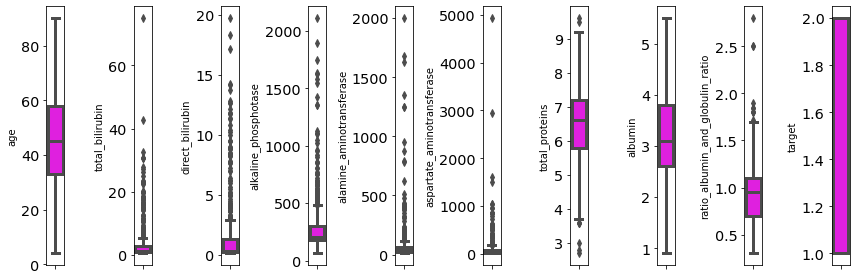

In [133]:
#boxplot 
ncol = ds_numerical.columns
features = ncol
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=ds_numerical[features[i]],color='magenta',orient='v')
    plt.tight_layout()

In [ ]:
#According with the graph we have the most of variables with outliers. However, it's important to analyse the quantity for each feature.


In [51]:
#categorical 
ds_categorical = ds.select_dtypes(include=np.object_)

In [52]:
ds_categorical

,gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
577,Male
578,Male
579,Male
580,Male


3. Exploratory analyses

Numerical

In [56]:
#statistical analyses 
ds_numerical.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,1.286942
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


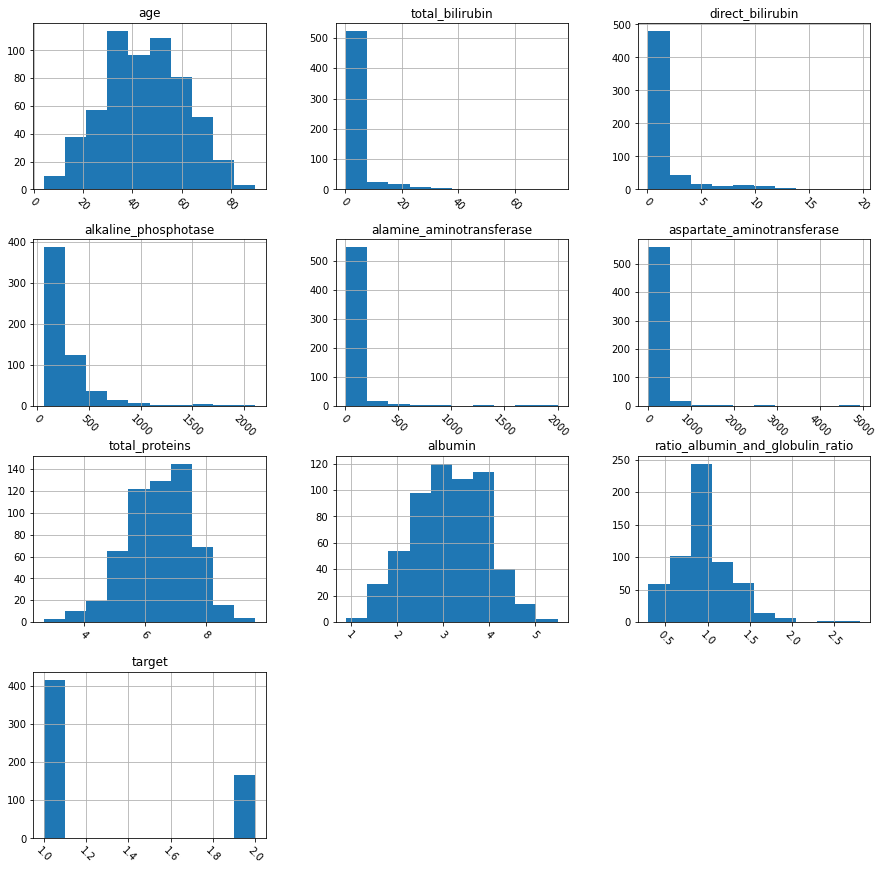

In [59]:
#Histograms
ds_numerical.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

In [ ]:
#It's seems to have a outlier in aspartate_aminotransferase and alamine_aminotransferase.

In [69]:
# Age, total_proteins  and albumin - seems to follow a normal distribution 
# to prove, it was done the normality test 

The null hypothesis cannot be rejected


In [76]:
#Age 
alpha =0.05
k2,p=stats.normaltest(ds_numerical['age'])

if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))
    
#P value was less then our significance level, so the probability of getting data like this is small. 
# Therefore, we can conclude that age doesn't follow a normal distribuiton.

The null hypothesis can be rejected, because the p value is :0.0007606642321579283 


In [77]:
#total_proteins
alpha =0.05
k2,p=stats.normaltest(ds_numerical['total_proteins'])
if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))
    
#P value was less then our significance level, so the probability of getting data like this is small. 
# Therefore, we can conclude that total_proteins doesn't follow a normal distribuiton.

The null hypothesis can be rejected, because the p value is :0.011323019707642778 


In [79]:
#albumin
alpha =0.05
k2,p=stats.normaltest(ds_numerical['albumin'])
if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))
    
#P value was less then our significance level, so the probability of getting data like this is small. 
# Therefore, we can conclude that albumin doesn't follow a normal distribuiton.

The null hypothesis cannot be rejected,because the p value  is: 0.05827804957447366 


In [72]:
#albumin
alpha =0.05
k2,p=stats.normaltest(ds_numerical['albumin'])

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


Correlations 

In [ ]:
#It's a important tool that show the relationships among numeric variables
#It's a value between -1 and 1, values near this numbers indicate a strong relationship whereas values next to 0 indicate a weak relationship.

<AxesSubplot:>

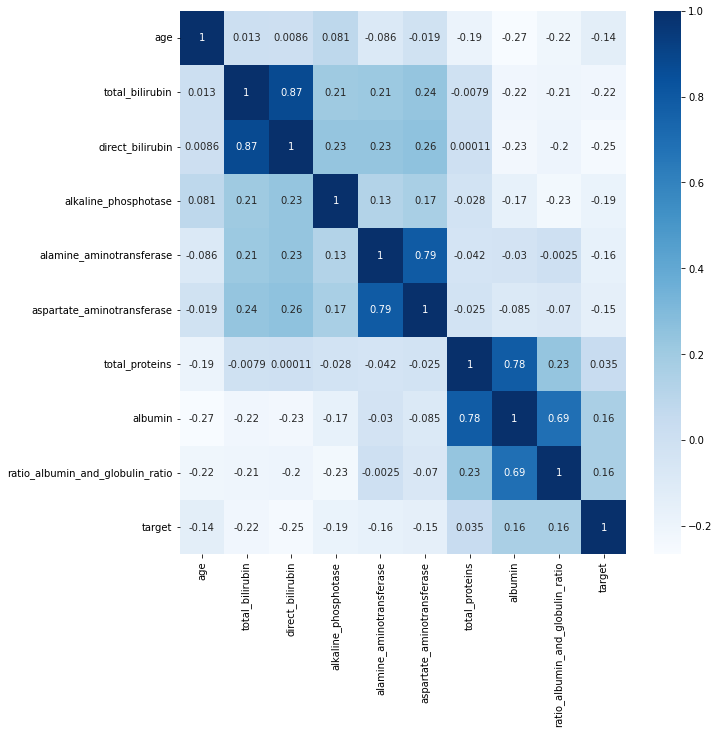

In [86]:
plt.figure(figsize= (10,10))
sns.heatmap(ds_numerical.corr(),cmap='Blues',annot=True)

In [87]:
#It possible noticed at the graph that we have indications of multicollienarity in :
#total_bilirubin and direct_bilirubin have a correlation of 0.87
# aspartate_aminotransferase and alamine _aminotransferase have a correlation of 0.79
# total_proteins andalbumine have a correlation of 0.78

#multicollinearity could be a problem because undermines the statistical significance of a independent variable. 


In [ ]:
#Categorical variable 